# Sentiment Analysis

Researchers have labelled words based on their domain expertise. We will be using this model, namely text blob module for our work. 
Using this model we get the results under two parameters:
1. subjectivity( ranges from 0 to +1)
2. polarity (ranges from -1 to +1)

For further reading on how textblob is coded, follow this link. 
https://planspace.org/20150607-textblob_sentiment/


In [18]:
import pandas as pd
data = pd.read_pickle('corpus.pkl')

In [19]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['Lyrics'].apply(pol)
data['subjectivity'] = data['Lyrics'].apply(sub)
data

,Lyrics,polarity,subjectivity
327,"[Chorus: Billie Essco & Westside Gunn]\nLook, ...",0.070521,0.464764
Block Party,[Intro: CJ Fly]\nStatik Selektah\nEvery time I...,0.199608,0.603007
Dangerookipawaa freestyle,"[Part I]\n\n[Intro]\nYeah\nYeah\nYeah, ayy, ma...",0.059487,0.456719
I like it,"[Intro]\nYeah baby, I like it like that\nYou g...",-0.049025,0.603856
Leader of Delinquents,"[Intro]\nMm (Yeah), mm, mm\n(This is not a tes...",0.088882,0.534906
Old town road,"[Intro: Billy Ray Cyrus]\nOh, oh-oh\nOh\n\n[Re...",-0.069087,0.287458
Shape of you,[Verse 1]\nThe club isn't the best place to fi...,0.319293,0.511347


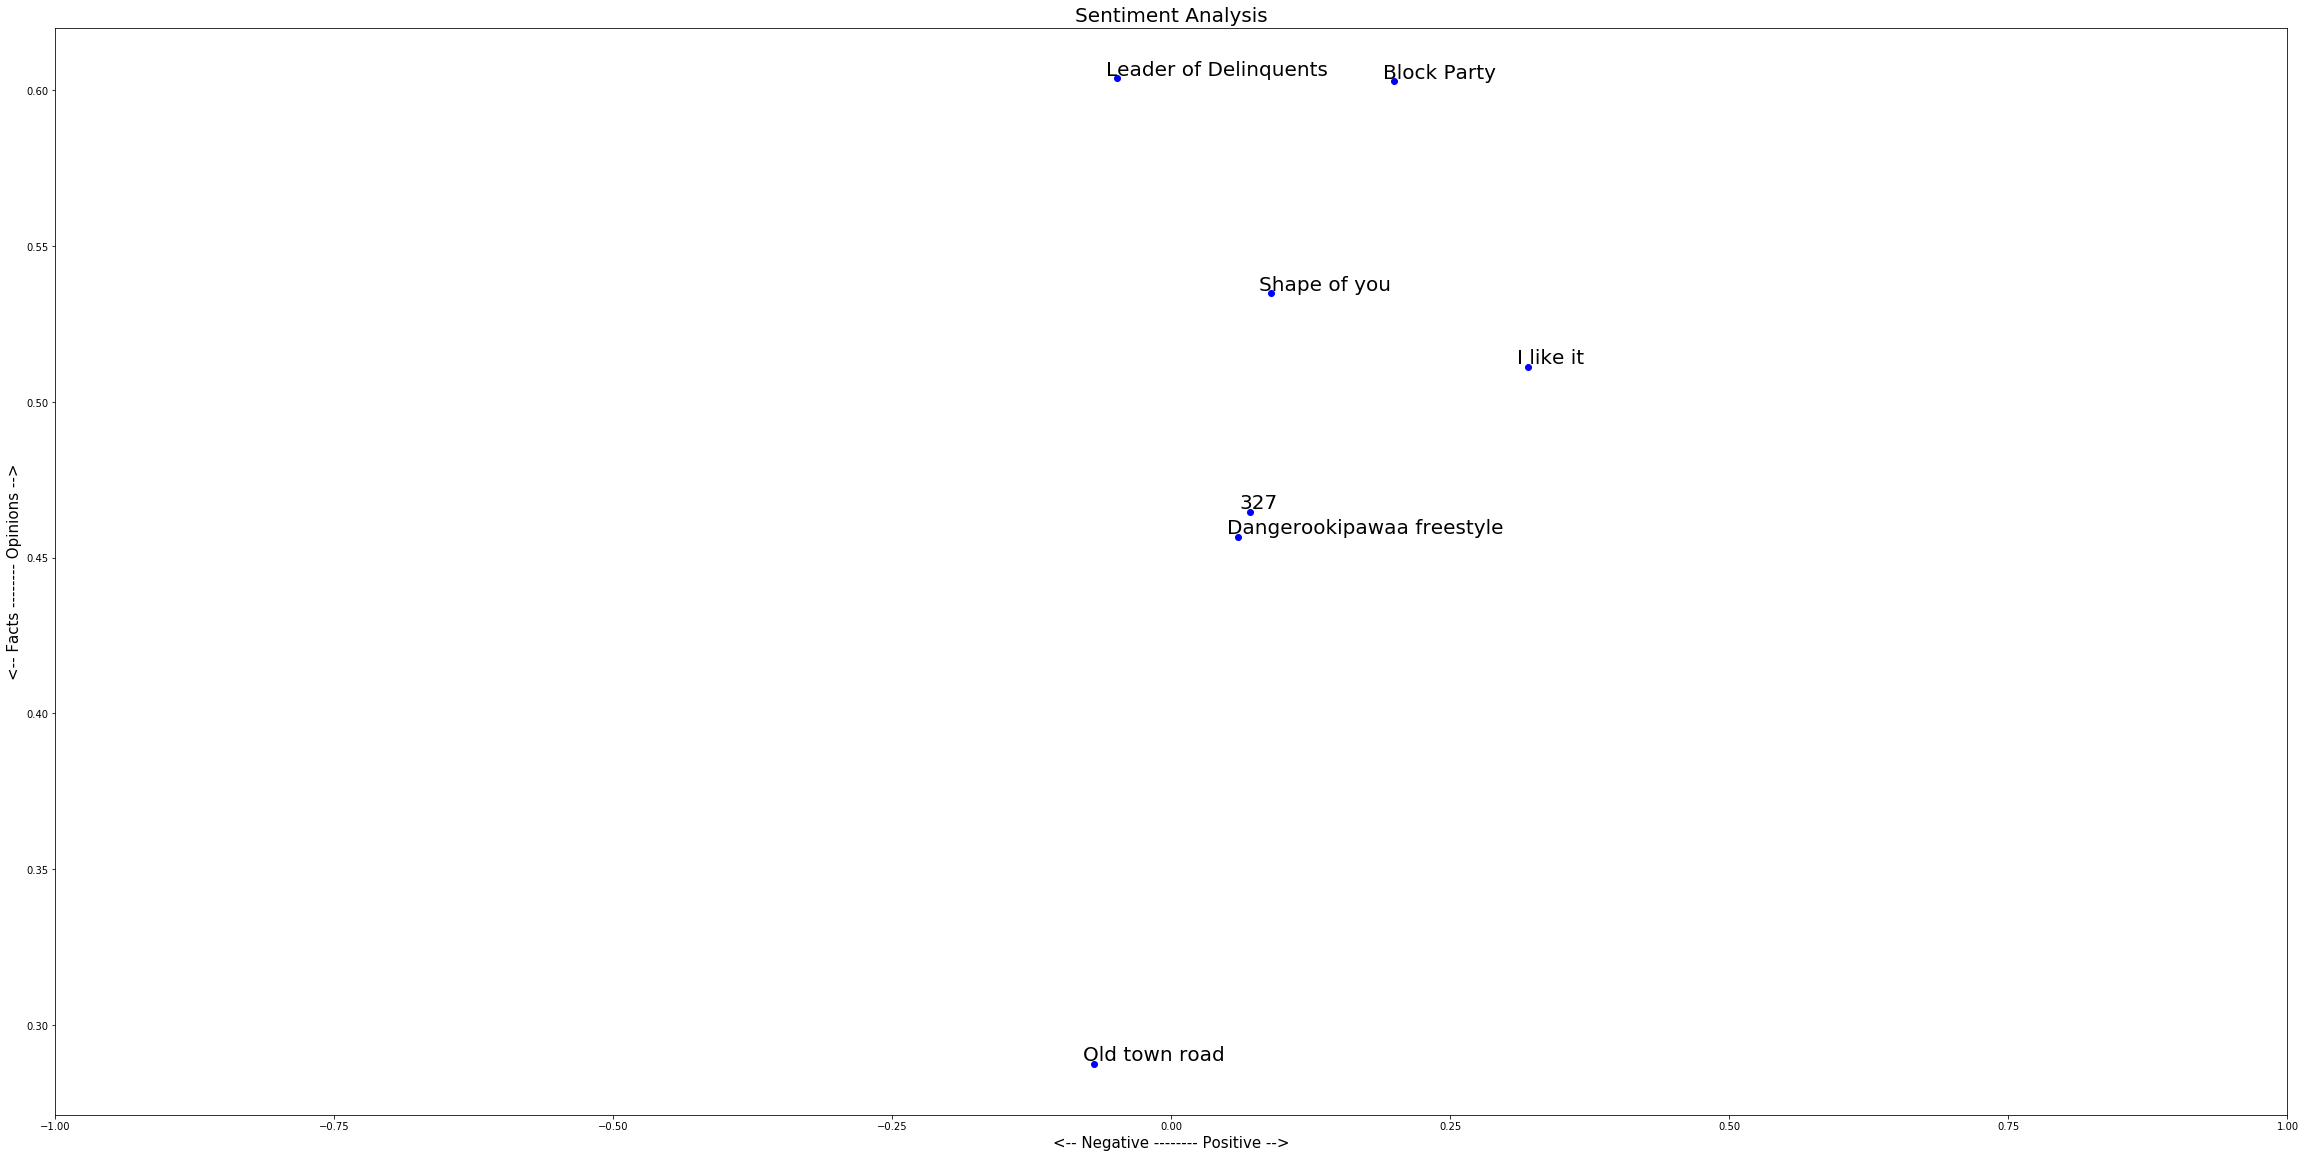

In [23]:

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [40, 20]
song_names = ['327', 'Block Party', 'Dangerookipawaa freestyle', 'Leader of Delinquents', 'Shape of you','Old town road','I like it']
index=['Lyrics','polariry','subjectivity']
for index, song in enumerate(data.index):
    x = data.polarity.loc[song]
    y = data.subjectivity.loc[song]
    plt.scatter(x, y, color='blue')
    plt.text(x-0.01, y+0.001, song_names[index], fontsize=20)
    plt.xlim(-1, 1) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

# Sentiment Analysis over time 

In [32]:
# Split each song into 10 parts
'''assumption: each song is of equal duration'''
'''track length can be used but we have to web scrape and clean data again'''
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [33]:
#Peek at our data again
data

,Lyrics,polarity,subjectivity
327,"[Chorus: Billie Essco & Westside Gunn]\nLook, ...",0.070521,0.464764
Block Party,[Intro: CJ Fly]\nStatik Selektah\nEvery time I...,0.199608,0.603007
Dangerookipawaa freestyle,"[Part I]\n\n[Intro]\nYeah\nYeah\nYeah, ayy, ma...",0.059487,0.456719
I like it,"[Intro]\nYeah baby, I like it like that\nYou g...",-0.049025,0.603856
Leader of Delinquents,"[Intro]\nMm (Yeah), mm, mm\n(This is not a tes...",0.088882,0.534906
Old town road,"[Intro: Billy Ray Cyrus]\nOh, oh-oh\nOh\n\n[Re...",-0.069087,0.287458
Shape of you,[Verse 1]\nThe club isn't the best place to fi...,0.319293,0.511347


In [34]:
#creating a list to hold all of the pieces of text

list_pieces = []
for t in data.Lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[["[Chorus: Billie Essco & Westside Gunn]\nLook, I swear Paris will be prayed for (Prayed for)\nUnreleased Off-White to the ankles, ayy\u2005(Ankles)\nI'm\u2005in them places\u2005that you can't go (That you\u2005can't go)\nDon C, Nigo in the same row, ayy (The same row)\nI swear Paris will be prayed for\nI need Casablanca by the caseload (Caseload, brr)\nSilks with the oranges and the mangoes (Mangoes)\nI'm a model now, baby, got the face for it, ayy (Face for it)\nI swear Paris will be prayed for (Ayy, yo)\n\n[Verse 1: Westside Gunn]\nI'm rockin' old Nashes, on the runway in my coke fashion\nAnybody move, ",
  "we toe-taggin' (Boom, boom, boom, boom, boom, boom, boom, boom, boom)\nMy 327s was blessings, leather Vuitton vests\nKeep a loaded firearm in Mercedes armrests, Lord stressin' (Skrrt)\nTwenty-two with grays, twenty-five left in the cage\nI told him hold your head, it's worse in a grave\nI threw coke in the pot, watched it bloom residue and consume\nHe started wavin', had a lig

In [35]:
# The list has 10 elements, one for 5 songs
len(list_pieces)

7

In [37]:
# Calculate the polarity for each piece of text

polarity_lyrics = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_lyrics.append(polarity_piece)
    
polarity_lyrics

[[0.03333333333333333,
  -0.15000000000000002,
  0.37619047619047624,
  0.0,
  -0.02861111111111111,
  -0.15695554445554447,
  0.21666666666666667,
  -0.15,
  0.30083333333333345,
  0.0],
 [0.445,
  0.0,
  0.21666666666666665,
  0.48666666666666664,
  0.10000000000000002,
  -0.010000000000000004,
  0.09999999999999999,
  -0.44999999999999996,
  0.5399999999999999,
  0.057500000000000016],
 [0.2,
  0.06818181818181818,
  0.175,
  0.07407407407407407,
  0.1166666666666667,
  0.5,
  0.11444444444444446,
  0.04384615384615385,
  -0.41111111111111115,
  0.00909090909090908],
 [0.0,
  -0.0069444444444444475,
  0.07500000000000001,
  -0.7874999999999999,
  0.13380681818181817,
  -0.0472222222222222,
  0.10000000000000005,
  -0.6999999999999998,
  -0.3516666666666666,
  0.5],
 [0.09652777777777778,
  0.2766233766233766,
  0.19999999999999998,
  -0.13000000000000003,
  -0.3194444444444444,
  0.20977272727272728,
  0.35,
  0.08877551020408163,
  -0.34375,
  0.5],
 [-0.075,
  -0.07916666666666666

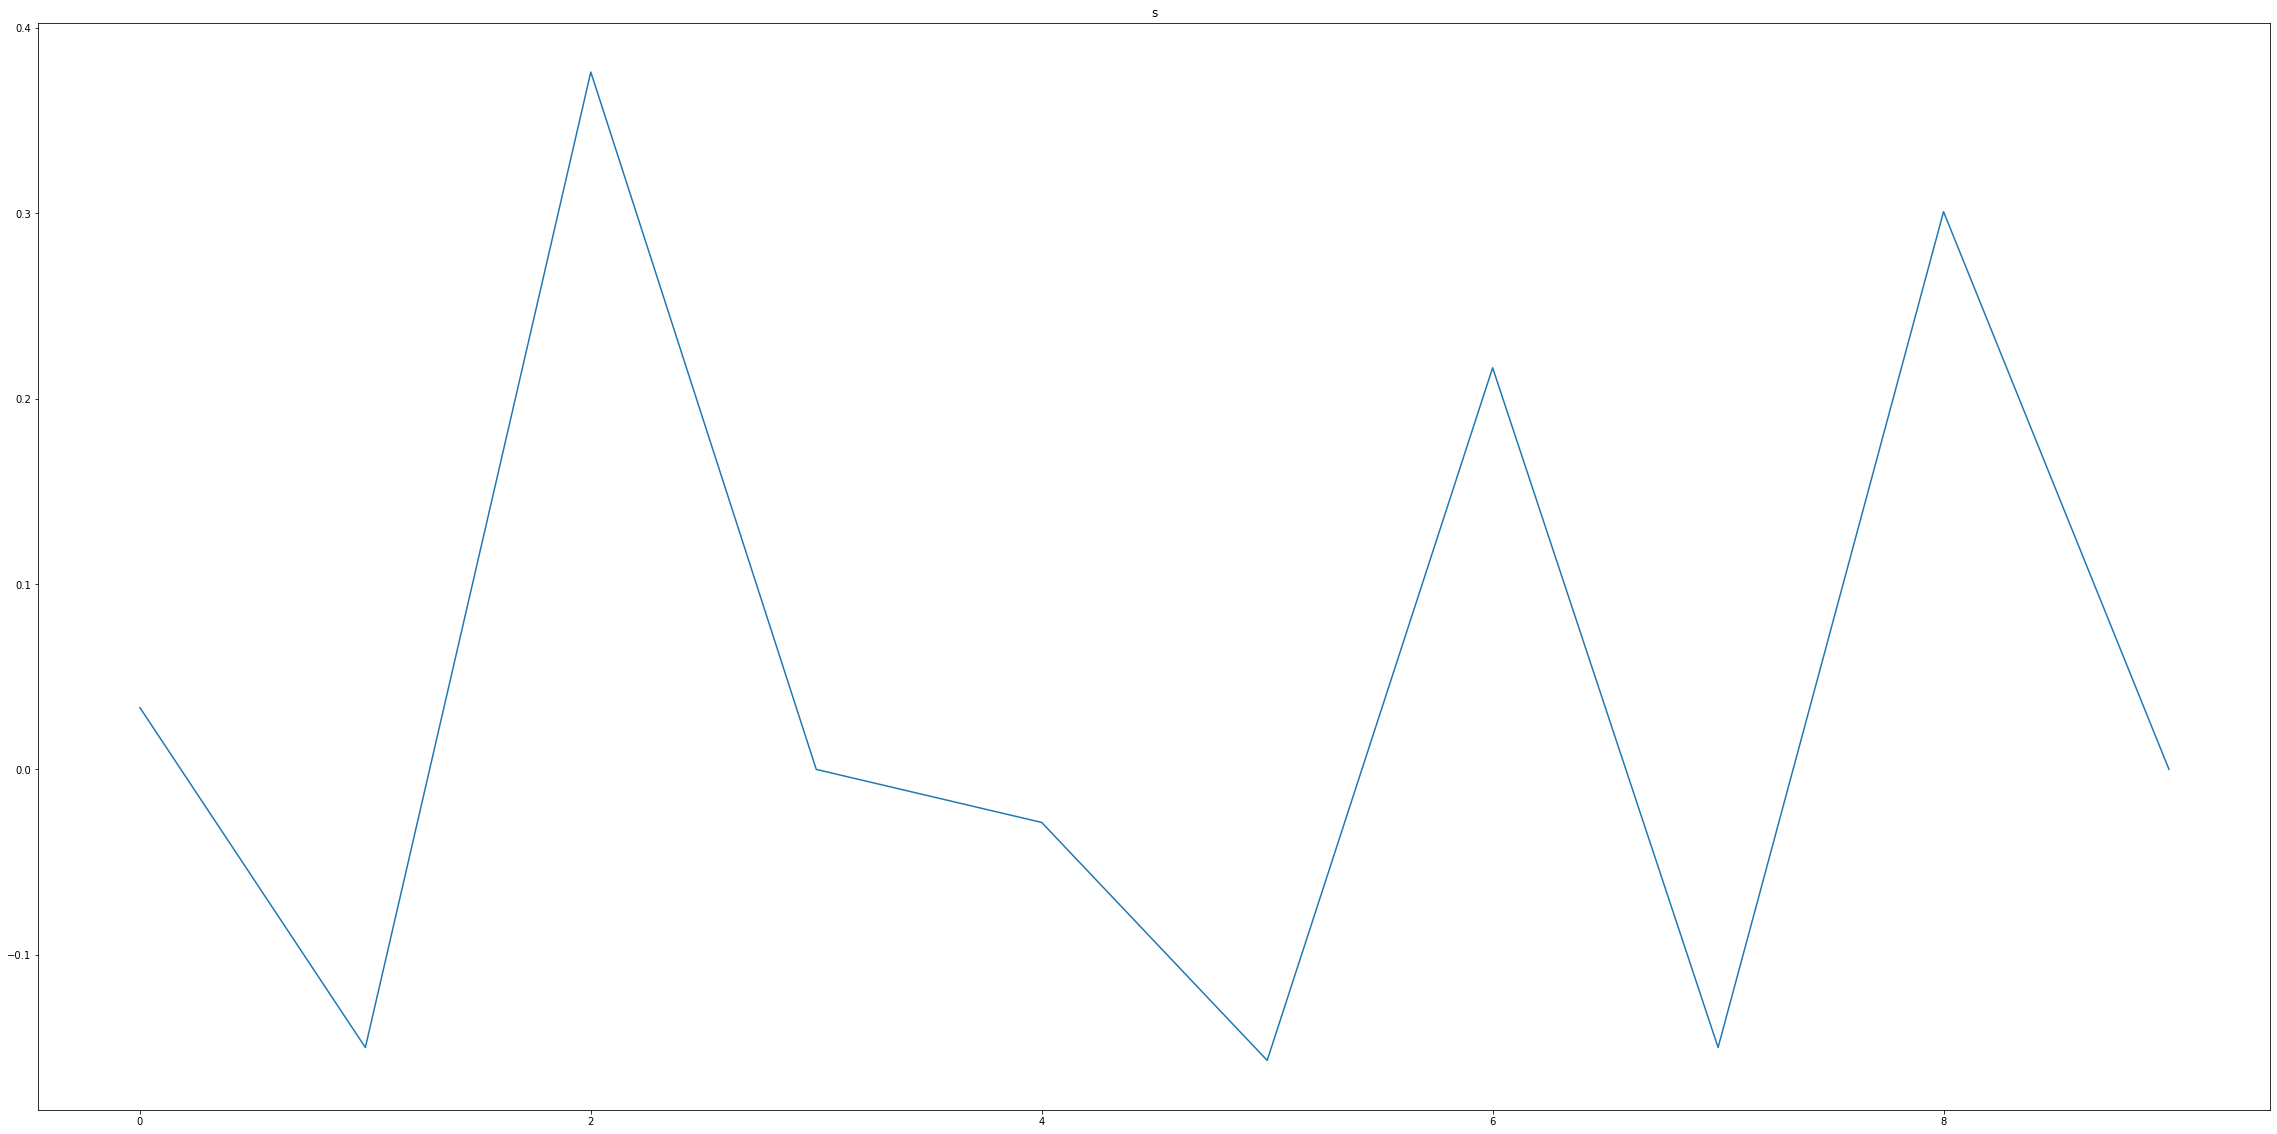

In [38]:
# Show the plot for one song
plt.plot(polarity_lyrics[0])
plt.title('song_names'[0])
plt.show()

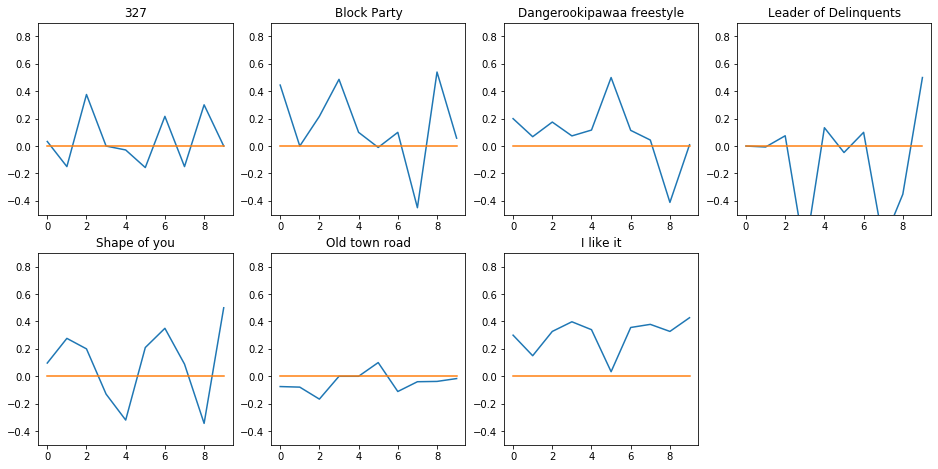

In [39]:
# Show the plot for all songs
plt.rcParams['figure.figsize'] = [16, 12]

for index, song in enumerate(data.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_lyrics[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(song_names[index])
    plt.ylim(ymin=-.5, ymax=.9)
    
plt.show()

# Findings